In [25]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import glob
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from IPython.display import display

- в обучающую выборку нужно добавить как можно больше примеров не руки, самый разный мусор, который они будут грузить
- почистить руки и оставить только ладони

In [11]:
### 10 изображений для 2х классов надо
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('classifier_data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('classifier_data/test',
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 13205 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [12]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 2,
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps = 0)

Epoch 1/2
2/2 [==============================] - 1s 475ms/step - loss: 0.1156 - accuracy: 0.9375
Epoch 2/2
2/2 [==============================] - 1s 362ms/step - loss: 0.3633 - accuracy: 0.8125


In [ ]:
classifier.save('models/classifier')

In [17]:
# classifier.evaluate_generator(test_set,steps=2)

In [26]:
def get_prediction(url):
    raw_test_image = image.load_img(url, target_size = (64, 64))
    test_image = image.img_to_array(raw_test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    if result[0][0] == 1:
        print('no')
    else:
        print('hand')
    display(raw_test_image)

In [32]:
files_1 = glob.glob('images/*')
files_2 = glob.glob('data/*')
files_3 = glob.glob('classifier_data/test_cd/dog/*')
files = files_1 + files_2 + files_3
files

['images/lifeLine.png',
 'images/palm.png',
 'images/hh1.png',
 'images/heartLine.png',
 'images/h2.png',
 'images/Screenshot (1697).png',
 'images/hand.jpeg',
 'images/headLine.png',
 'data/2021-06-25 11.26.46 AM.jpg',
 'data/2021-06-25 11.25.57 AM.jpg',
 'data/2021-06-25 11.26.21 AM.jpg',
 'data/2021-06-25 11.27.01 AM.jpg',
 'data/2021-06-25 11.26.57 AM.jpg',
 'data/2021-06-25 11.26.51 AM.jpg',
 'data/2021-06-25 11.26.32 AM.jpg',
 'data/2021-06-25 11.26.41 AM.jpg',
 'classifier_data/test_cd/dog/dog.1.jpg',
 'classifier_data/test_cd/dog/dog.0.jpg',
 'classifier_data/test_cd/dog/dog.2.jpg',
 'classifier_data/test_cd/dog/dog.3.jpg',
 'classifier_data/test_cd/dog/dog.7.jpg',
 'classifier_data/test_cd/dog/dog.6.jpg',
 'classifier_data/test_cd/dog/dog.4.jpg',
 'classifier_data/test_cd/dog/dog.5.jpg',
 'classifier_data/test_cd/dog/dog.8.jpg',
 'classifier_data/test_cd/dog/dog.9.jpg',
 'classifier_data/test_cd/dog/dog.17.jpg',
 'classifier_data/test_cd/dog/dog.16.jpg',
 'classifier_data/test

no


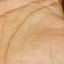

no


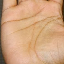

no


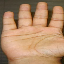

no


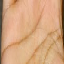

no


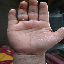

no


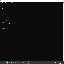

hand


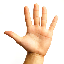

no


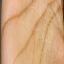

no


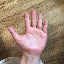

no


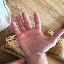

no


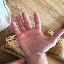

no


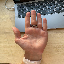

no


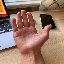

no


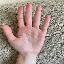

no


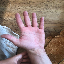

no


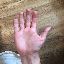

no


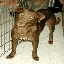

no


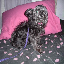

no


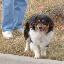

hand


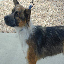

no


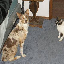

no


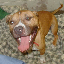

no


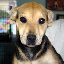

no


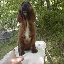

no


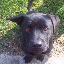

no


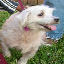

hand


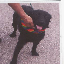

no


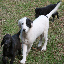

hand


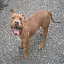

no


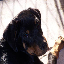

no


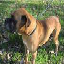

hand


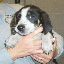

no


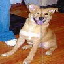

no


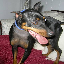

In [33]:
for file in files:
    get_prediction(file)
